c:\Users\VASU MONPARA\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\_histograms_impl.py:897: RuntimeWarning: invalid value encountered in divide
  return n / db / n.sum(), bin_edges


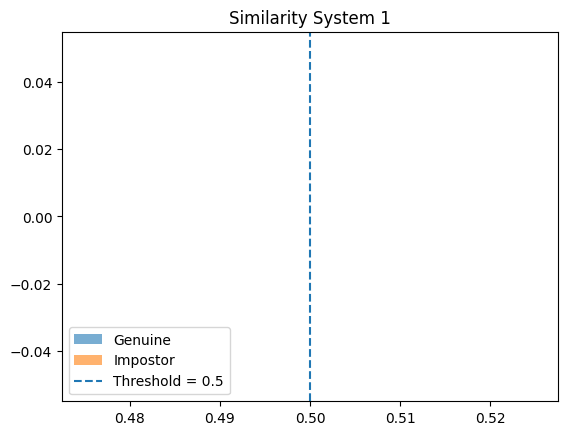

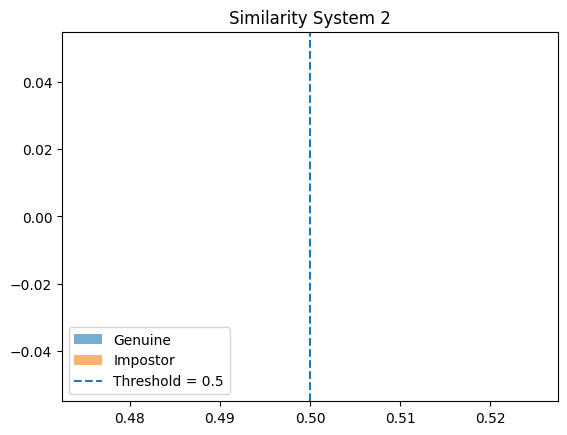

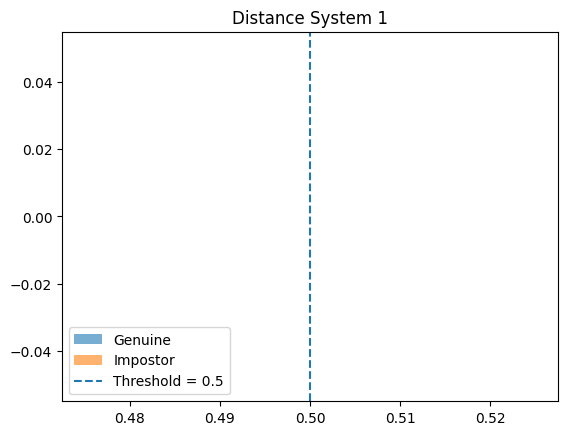

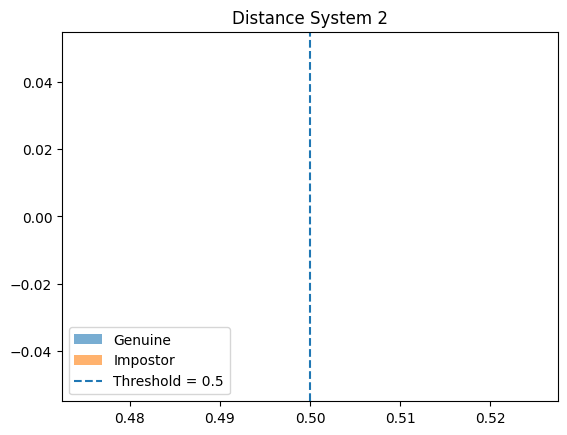

c:\Users\VASU MONPARA\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\_core\fromnumeric.py:3860: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\VASU MONPARA\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\_core\_methods.py:144: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


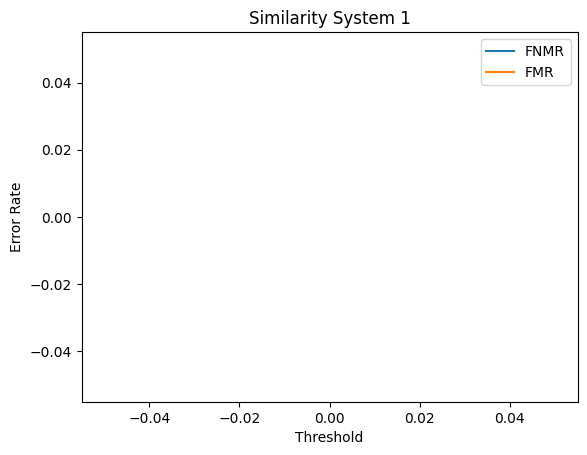

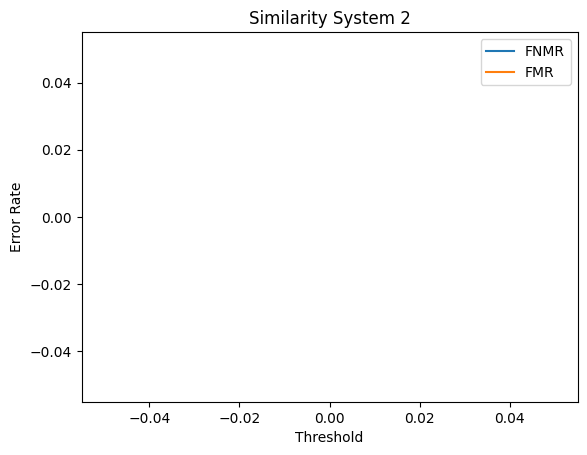

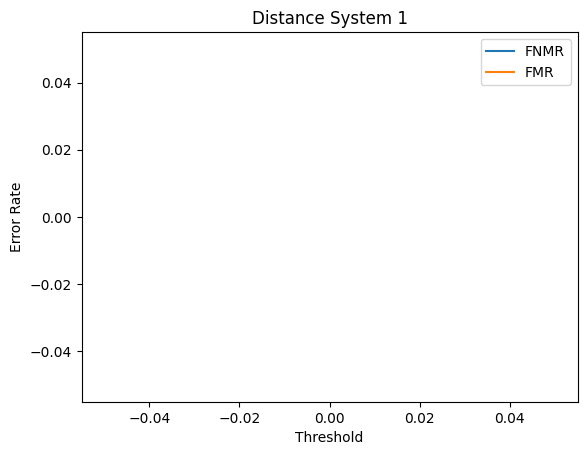

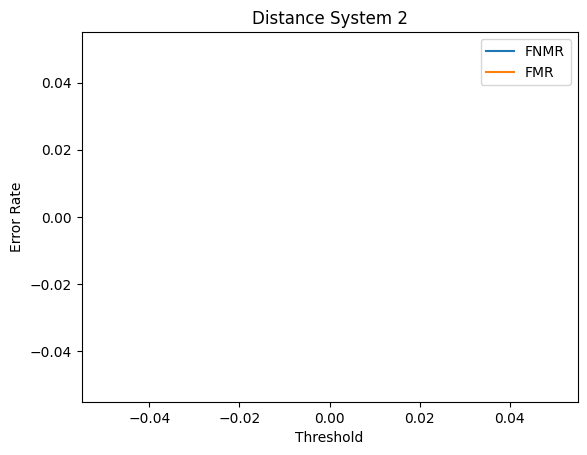

Similarity System 1 -> EER: nan at threshold 0.00
Similarity System 2 -> EER: nan at threshold 0.00
Distance System 1 -> EER: nan at threshold 0.00
Distance System 2 -> EER: nan at threshold 0.00


c:\Users\VASU MONPARA\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_ranking.py:1303: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
c:\Users\VASU MONPARA\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_ranking.py:1303: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
c:\Users\VASU MONPARA\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_ranking.py:1303: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
c:\Users\VASU MONPARA\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_ranking.py:1303: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


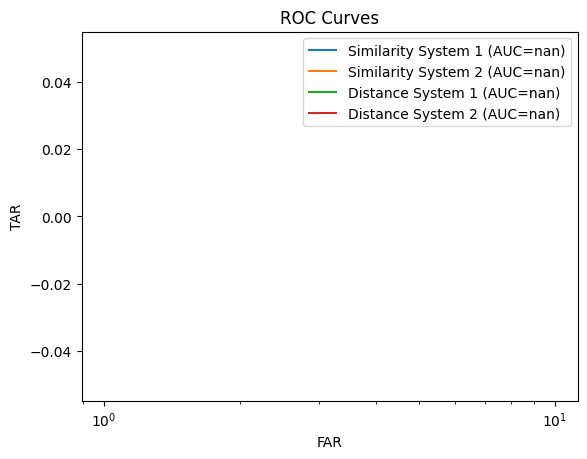

c:\Users\VASU MONPARA\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_ranking.py:1303: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
c:\Users\VASU MONPARA\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_ranking.py:1303: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
c:\Users\VASU MONPARA\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_ranking.py:1303: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


Similarity System 1 -> AUC = nan
Similarity System 2 -> AUC = nan
Distance System 1 -> AUC = nan


c:\Users\VASU MONPARA\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_ranking.py:1303: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
c:\Users\VASU MONPARA\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\_core\fromnumeric.py:3860: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\VASU MONPARA\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\_core\_methods.py:144: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
c:\Users\VASU MONPARA\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\_core\fromnumeric.py:4268: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\Users\VASU MONPARA\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\_core\_methods.py:180: RuntimeWarning: invalid 

Distance System 2 -> AUC = nan
Similarity System 1
d-prime: nan
F-ratio: nan
------------------
Similarity System 2
d-prime: nan
F-ratio: nan
------------------
Distance System 1
d-prime: nan
F-ratio: nan
------------------
Distance System 2
d-prime: nan
F-ratio: nan
------------------


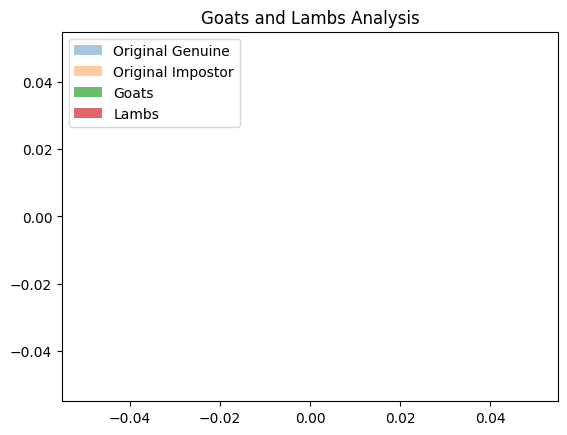

Lab 1 Biometric Metrics Notebook Ready


In [8]:
# Lab 1: Biometric System Errors and Metrics
# Simple, cell-wise Jupyter Notebook Template

# ==============================
# CELL 1: Imports
# ==============================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc


# ==============================
# CELL 2: Load CSV Files
# ==============================
sim1 = pd.read_csv('similarity_scores1.csv')
sim2 = pd.read_csv('similarity_scores2.csv')
dist1 = pd.read_csv('distance_scores1.csv')
dist2 = pd.read_csv('distance_scores2.csv')



systems = {
    'Similarity System 1': sim1,
    'Similarity System 2': sim2,
    'Distance System 1': dist1,
    'Distance System 2': dist2
}


# ==============================
# CELL 3: Separate Genuine & Impostor
# ==============================
def split_scores(df):
    genuine = df[df['label'] == 'g']['score'].values
    impostor = df[df['label'] == 'i']['score'].values
    return genuine, impostor


# ==============================
# CELL 4: Plot Distributions + Threshold
# ==============================
def plot_distributions(genuine, impostor, title):
    plt.figure()
    plt.hist(genuine, bins=50, density=True, alpha=0.6, label='Genuine')
    plt.hist(impostor, bins=50, density=True, alpha=0.6, label='Impostor')
    plt.axvline(0.5, linestyle='--', label='Threshold = 0.5')
    plt.title(title)
    plt.legend()
    plt.show()

for name, df in systems.items():
    g, i = split_scores(df)
    plot_distributions(g, i, name)


# ==============================
# CELL 5: FNMR & FMR Functions
# ==============================
def compute_errors(genuine, impostor, thresholds, mode='similarity'):
    FNMR = []
    FMR = []
    for t in thresholds:
        if mode == 'similarity':
            fnmr = np.mean(genuine < t)
            fmr = np.mean(impostor >= t)
        else:  # distance
            fnmr = np.mean(genuine > t)
            fmr = np.mean(impostor <= t)
        FNMR.append(fnmr)
        FMR.append(fmr)
    return np.array(FNMR), np.array(FMR)


# ==============================
# CELL 6: FNMR/FMR vs Threshold
# ==============================
thresholds = np.arange(0, 1.01, 0.01)

error_data = {}

for name, df in systems.items():
    g, i = split_scores(df)
    mode = 'similarity' if 'Similarity' in name else 'distance'
    FNMR, FMR = compute_errors(g, i, thresholds, mode)
    error_data[name] = (FNMR, FMR)

    plt.figure()
    plt.plot(thresholds, FNMR, label='FNMR')
    plt.plot(thresholds, FMR, label='FMR')
    plt.title(name)
    plt.xlabel('Threshold')
    plt.ylabel('Error Rate')
    plt.legend()
    plt.show()


# ==============================
# CELL 7: EER Calculation
# ==============================
def compute_eer(FNMR, FMR, thresholds):
    diff = np.abs(FNMR - FMR)
    idx = np.argmin(diff)
    return thresholds[idx], FNMR[idx]

for name in error_data:
    FNMR, FMR = error_data[name]
    eer_t, eer = compute_eer(FNMR, FMR, thresholds)
    print(f"{name} -> EER: {eer:.4f} at threshold {eer_t:.2f}")


# ==============================
# CELL 8: ROC Curves
# ==============================
plt.figure()

for name, df in systems.items():
    labels = (df['label'] == 'g').astype(int)
    scores = df['score'].values
    if 'Distance' in name:
        scores = -scores  # invert for ROC
    fpr, tpr, _ = roc_curve(labels, scores)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{name} (AUC={roc_auc:.3f})")

plt.xscale('log')
plt.xlabel('FAR')
plt.ylabel('TAR')
plt.title('ROC Curves')
plt.legend()
plt.show()


# ==============================
# CELL 9: AUC Values
# ==============================
for name, df in systems.items():
    labels = (df['label'] == 'g').astype(int)
    scores = df['score'].values
    if 'Distance' in name:
        scores = -scores
    fpr, tpr, _ = roc_curve(labels, scores)
    roc_auc = auc(fpr, tpr)
    print(f"{name} -> AUC = {roc_auc:.4f}")


# ==============================
# CELL 10: d-prime & F-ratio
# ==============================
def d_prime(g, i):
    return abs(np.mean(g)-np.mean(i))/np.sqrt(0.5*(np.var(g)+np.var(i)))

def f_ratio(g, i):
    return (np.mean(g)-np.mean(i))**2/(np.var(g)+np.var(i))

for name, df in systems.items():
    g, i = split_scores(df)
    print(name)
    print('d-prime:', d_prime(g,i))
    print('F-ratio:', f_ratio(g,i))
    print('------------------')


# ==============================
# CELL 11: Goats & Lambs (Single System Example)
# ==============================
# Choose one system (example: Similarity System 1)
df = sim1.copy()

g, i = split_scores(df)

threshold = 0.5
fn_scores = g[g < threshold]   # goats
fp_scores = i[i >= threshold]  # lambs

# Top 5%
goats = np.sort(fn_scores)[-int(0.05*len(fn_scores)) :]
lambs = np.sort(fp_scores)[-int(0.05*len(fp_scores)) :]

plt.figure()
plt.hist(g, bins=50, density=True, alpha=0.4, label='Original Genuine')
plt.hist(i, bins=50, density=True, alpha=0.4, label='Original Impostor')
plt.hist(goats, bins=30, density=True, alpha=0.7, label='Goats')
plt.hist(lambs, bins=30, density=True, alpha=0.7, label='Lambs')
plt.legend()
plt.title('Goats and Lambs Analysis')
plt.show()


# ==============================
# END NOTEBOOK
# ==============================
print("Lab 1 Biometric Metrics Notebook Ready")
